In [2]:
import config as config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly as py #pip install plotly
import plotly.graph_objs as go
from scipy import stats
from prophet import Prophet #pip install fbprophet
import warnings


In [3]:
# load all data
energy = pd.read_csv(r'C:\Users\16508\Downloads\household_power_consumption\household_power_consumption.txt',sep=';', na_values="?")

In [4]:
energy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Text(0.5, 1.0, 'Single Household Energy Consumption Hourly')

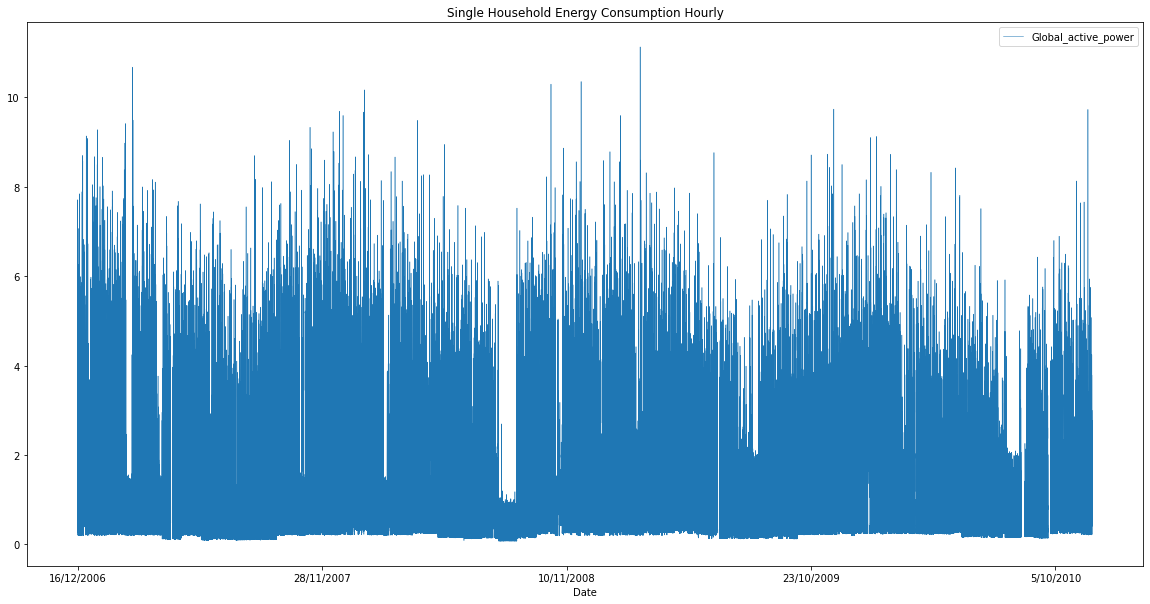

In [5]:
from matplotlib.pyplot import figure

energy.plot(x='Date',y='Global_active_power',lw = 0.5,figsize=(20,10))
plt.title("Single Household Energy Consumption Hourly")

In [6]:
energy.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
energy.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
energy.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
dtypes = {'Date': str,
          'Time': str,
          'Global_active_power': float,
          'Global_reactive_power': float,
          'Voltage': float,
          'Global_intensity': float,
          'Sub_metering_1': float,
          'Sub_metering_2': float,
          'Sub_metering_3': float}

#Deal with missing values
energy = energy.fillna(method='ffill')

In [10]:
energy.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
#Insert additional columns
energy.insert(0, 'Date_Time', pd.to_datetime(energy['Date'] + ' ' + energy['Time'])) #datetime format
energy.insert(2, 'Year',energy['Date_Time'].dt.year) #year
energy.insert(3, 'Month',energy['Date_Time'].dt.month) #month
energy.insert(4, 'Day',energy['Date_Time'].dt.weekday) #weekday_name
energy.insert(5, 'Hour',energy['Date_Time'].dt.hour) #hour

#Exclude other numerical variables (univariate analysis)
energy = energy.iloc[:,0:8]

#Preview data
energy.head()

,Date_Time,Date,Year,Month,Day,Hour,Time,Global_active_power
0,2006-12-16 17:24:00,16/12/2006,2006,12,5,17,17:24:00,4.216
1,2006-12-16 17:25:00,16/12/2006,2006,12,5,17,17:25:00,5.360
2,2006-12-16 17:26:00,16/12/2006,2006,12,5,17,17:26:00,5.374
3,2006-12-16 17:27:00,16/12/2006,2006,12,5,17,17:27:00,5.388
4,2006-12-16 17:28:00,16/12/2006,2006,12,5,17,17:28:00,3.666


In [12]:
energy['Global_active_power'].describe()

count    2.075259e+06
mean     1.086168e+00
std      1.053172e+00
min      7.600000e-02
25%      3.080000e-01
50%      5.980000e-01
75%      1.524000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

In [13]:
np.round(energy['Global_active_power'].describe(), 2).apply(lambda x: format(x, 'f'))

count    2075259.000000
mean           1.090000
std            1.050000
min            0.080000
25%            0.310000
50%            0.600000
75%            1.520000
max           11.120000
Name: Global_active_power, dtype: object

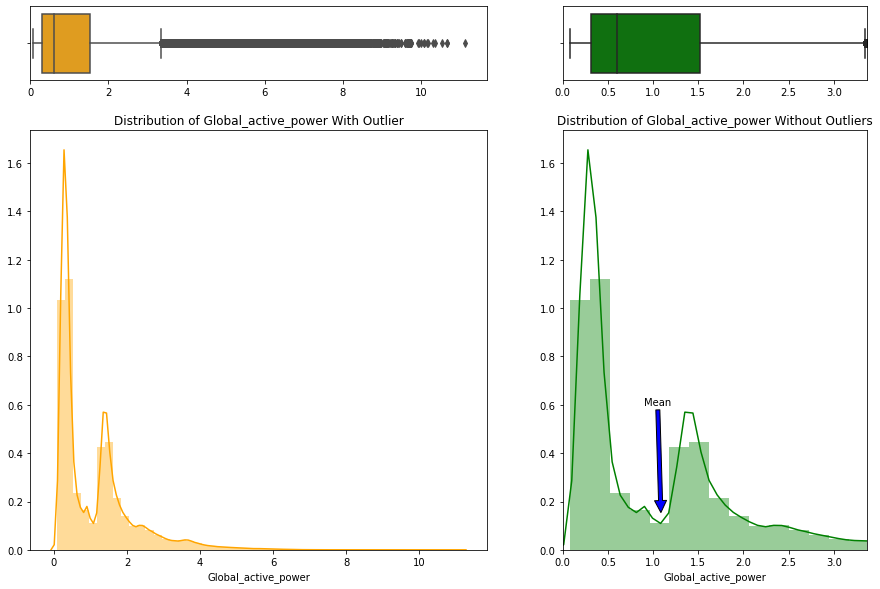

In [14]:
# Create subplots
f, axes = plt.subplots(2,
                       2, 
                       figsize=(15, 10), 
                       sharex=False, 
                       gridspec_kw={"height_ratios": (.15, .85),"width_ratios":(.60,.40)})
#Main boxplot
sns.boxplot(energy["Global_active_power"] , color="orange", ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_xlim(0, None)

#Main distribution
sns.distplot(energy["Global_active_power"] , color="orange", ax=axes[1,0])
axes[0,0].set_xlim(0, None)
axes[1,0].set_title('Distribution of Global_active_power With Outlier')

#Zoom boxplot
sns.boxplot(energy["Global_active_power"], color="green", ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_xlim(0, 3.37)

#Zoom distribution
sns.distplot(energy["Global_active_power"], color="green", ax=axes[1,1])
axes[1,1].set_title('Distribution of Global_active_power Without Outliers')
axes[1,1].set_xlim(0, 3.37)

# Add an arrow to mark the mean value
axes[1,1].annotate(
'Mean', xy=(energy["Global_active_power"].mean(), .15), xytext=(.9, .6),
arrowprops=dict(facecolor='blue', shrink=0.01))

plt.show()

Text(0.5, 1.0, 'Single Household Energy Consumption Hourly')

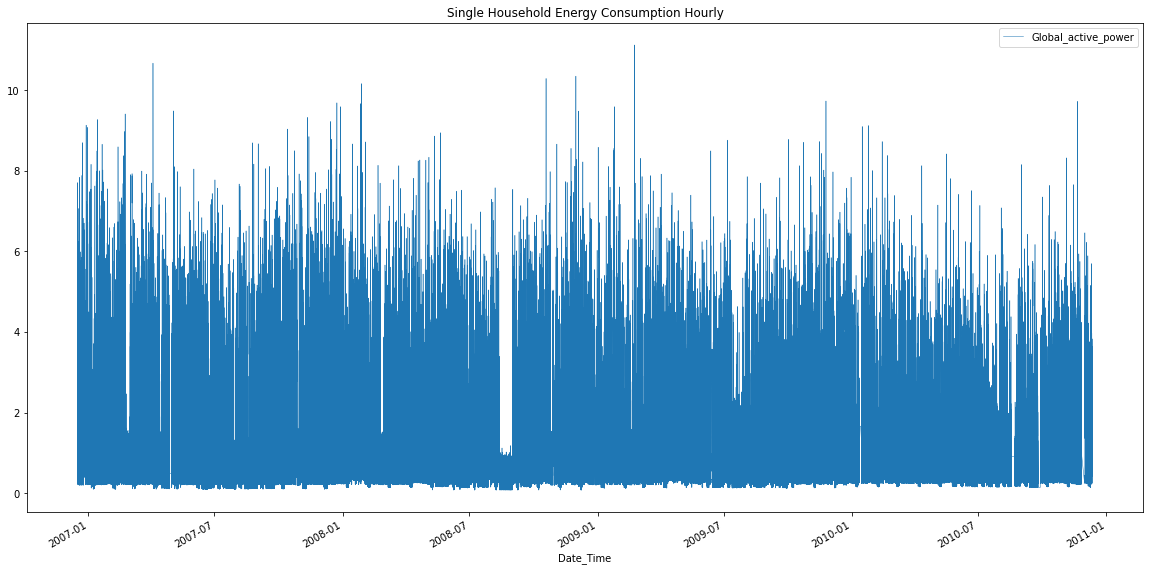

In [15]:
from matplotlib.pyplot import figure

energy.plot(x='Date_Time',y='Global_active_power',lw = 0.5,figsize=(20,10))
plt.title("Single Household Energy Consumption Hourly")

In [16]:
energy.head(5)

,Date_Time,Date,Year,Month,Day,Hour,Time,Global_active_power
0,2006-12-16 17:24:00,16/12/2006,2006,12,5,17,17:24:00,4.216
1,2006-12-16 17:25:00,16/12/2006,2006,12,5,17,17:25:00,5.360
2,2006-12-16 17:26:00,16/12/2006,2006,12,5,17,17:26:00,5.374
3,2006-12-16 17:27:00,16/12/2006,2006,12,5,17,17:27:00,5.388
4,2006-12-16 17:28:00,16/12/2006,2006,12,5,17,17:28:00,3.666


In [17]:
#energy_monthly_summary

NameError: name 'energy_monthly_summary' is not defined

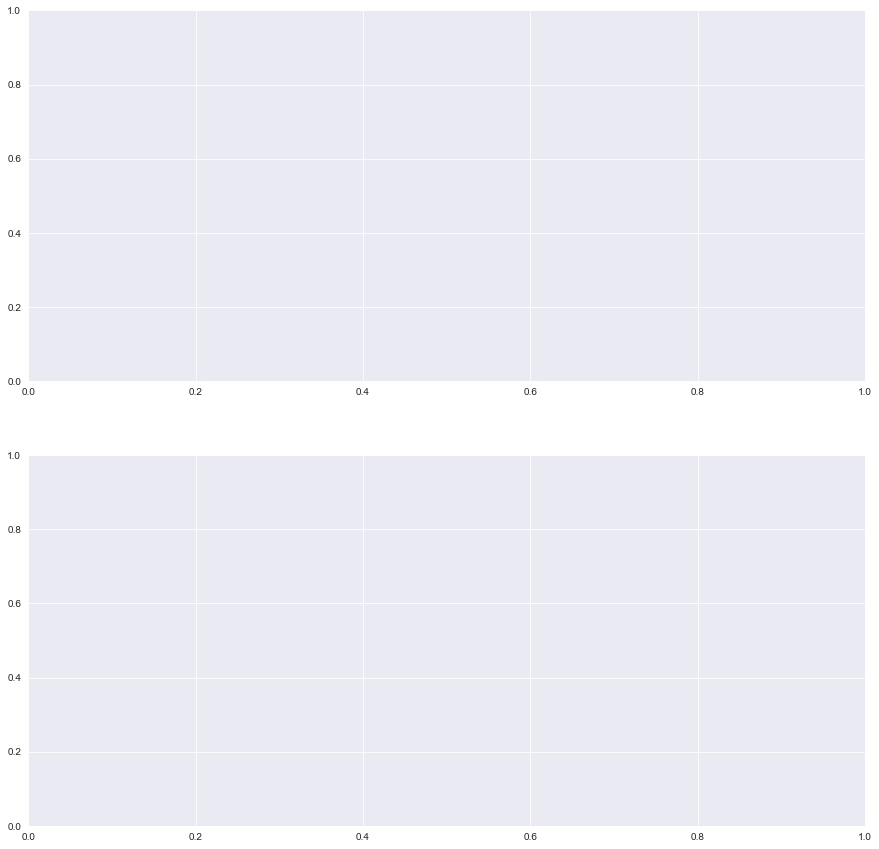

In [18]:
Summarize power by month (mean, median, max)
energy_monthly_summary = (energy.groupby(['Year','Month','Date'],as_index=False).agg(**{'mean_active_power':('Global_active_power','mean'), \
#                                                                            'median_active_power':('Global_active_power','median'), \
#                                                                            'max_active_power':('Global_active_power','max')}))


# Create subplots
sns.set_style("darkgrid")
f, axes = plt.subplots(2, figsize=(15, 15), sharex=False)

# Monthly Mean subplot
mean = sns.barplot(x=energy_monthly_summary.Month,
            y=energy_monthly_summary.mean_active_power,
            hue=energy_monthly_summary.Year,
            palette="Set2",
            ax=axes[0],
            ci=None)
mean.set_title('Monthly Global Active Power Summary')
mean.set_ylabel('Daily Mean Power by Month')
mean.legend_.remove()

# Monthly Median subplot
#median = sns.barplot(x=energy_monthly_summary.Month,
#            y=energy_monthly_summary.median_active_power,
#            hue=energy_monthly_summary.Year,
#            palette="Set2",
#            ax=axes[1],
#            ci=None)
#median.legend_.remove()
#median.set_ylabel('Daily Median Power by Month')

# Monthly Peak subplot
max = sns.barplot(x=energy_monthly_summary.Month,
            y=energy_monthly_summary.max_active_power,
            hue=energy_monthly_summary.Year,
            palette="Set2",
            ax=axes[1],
            ci=None) 
max.set_ylabel('Daily Peak Power by Month')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 2.35), shadow=True, ncol=5)

In [ ]:
energy_monthly_summary

In [ ]:
energy_weekday_summary = energy.groupby(by=['Year','Month','Day'], as_index=False)[['Global_active_power']].mean()

day_plot = sns.catplot(x="Day", y="Global_active_power", data=energy_weekday_summary.query("Year != 2006"), 
           kind="bar",
           col="Year")
day_plot.set_titles(size = 15)

In [ ]:
from sklearn import preprocessing

#summarize by mean hourly energy
energy_hourly_summary = energy.groupby(
    by=['Year','Month','Day',"Hour"], as_index=False)[['Global_active_power']].mean()

#create the Label Encoder object
le = preprocessing.LabelEncoder()

#encode categorical data
energy_hourly_summary['Year'] = le.fit_transform(energy_hourly_summary['Year'])
energy_hourly_summary.head()

In [ ]:
from sklearn.model_selection import train_test_split
x = energy_hourly_summary[['Year','Month','Day','Hour']]
y = energy_hourly_summary.Global_active_power
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.75, test_size = 0.25, random_state=1)

## SARIMA

In [ ]:
indexed_engery = energy[['Date_Time','Global_active_power', 'Year', 'Month']].set_index('Date_Time');
train = indexed_engery[indexed_engery['Year'] < 2010] #train set is years 2006 - 2009
test = indexed_engery[indexed_engery['Year'] == 2010] #test set is year 2010

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
train_monthly=train[['Global_active_power']].resample('W').mean()
model1 = SARIMAX(train_monthly, order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 100), #100 = number of weeks that we are forcasting
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model1.fit()

In [ ]:
results.forecast()

In [ ]:
predictions = results.predict(start='2010-01-03', end='2010-12-19')

## Evaluation

In [ ]:
# predictions.index
f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)
axes[0].hist(predictions.values, bins=10,color='green')
axes[0].set_title("Distribution of Predicted Energy Values 2010")
axes[1].hist((test[['Global_active_power']].resample('W').mean().values), bins=10,color='Orange')
axes[1].set_title("Distribution of Actual Energy Values 2010")
plt.show()

In [ ]:
#merge on Date_Time
test[['Global_active_power']].resample('W').mean().reset_index()
prediction = pd.DataFrame(predictions).reset_index()
prediction.columns = ['Date_Time','Global_active_power']

res = pd.merge(test[['Global_active_power']].resample('W').mean(), 
               prediction, 
               how='left', 
               on='Date_Time')

res.columns = ['Date_Time','actual','predictions']
res.insert(3, 'residuals', res['actual'] - res['predictions']) #residuals
res.head()


In [ ]:
#MSE
print("MSE = ", np.mean(res['residuals']**2)) #MSE
print("RMSE = ", np.sqrt(np.mean(res['residuals']**2))) #RMSE


In [ ]:
#MSE
print("MSE = ", np.mean(res['residuals']**2)) #MSE

f, axes = plt.subplots(2, figsize=(15, 10), sharex=True)

#plot of actual vs predictions
axes[0].plot(res['Date_Time'],res['actual'], color='red', label='actual')
axes[0].plot(res['Date_Time'],res['predictions'], color='green', label='prediction')
axes[0].set_title('Actual vs Predicted Power Consumption')
axes[0].set_ylabel('Global_active_power')
axes[0].legend()

#plot of actual - predictions
axes[1].scatter(res['Date_Time'],(res['actual'] - res['predictions']))
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Dates By Week')
axes[1].set_ylabel('Actuals - Predictions')
axes[1].axhline(y=0, color='black', linestyle=':')

plt.show()



## PROPHET

In [ ]:
train_2 = train.resample('D').mean().reset_index()
train_2 = train_2[['Date_Time', 'Global_active_power']]
train_2.columns = ['ds', 'y']
train_2.head()

In [ ]:
test_2 = test.resample('D').mean().reset_index()
test_2 = test_2[['Date_Time', 'Global_active_power']]
test_2.columns = ['ds', 'y']
test_2.head()

In [ ]:
cmdstanpy.install_cxx_toolchain

In [ ]:
ph = Prophet(weekly_seasonality=False)
ph.add_seasonality(name='daily', period=1, fourier_order=8)
ph.fit(train_2)

In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.plot(train_2['ds'], train_2['y'])

In [ ]:
future = ph.make_future_dataframe(periods=365)
forecast = ph.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

In [ ]:
# prophet components
Prophet.plot_components(ph,forecast)

## Evaluation

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.plot(test_2.ds, test_2.y, '.', color='C0', label = "test_actual")
plt.plot(train_2.ds, train_2.y, '.', color='C1', label = "train_actual")
plt.plot(forecast.ds, forecast.yhat, color='C2', label = "forecast")
plt.fill_between(forecast.ds, forecast.yhat_lower, forecast.yhat_upper, color=(52/255, 152/255, 219/255, 0.2))
plt.grid(color=(0, 0, 0), linestyle='-', linewidth=1, alpha=0.05)
plt.xlabel('Global_active_power')
plt.title('Daily Energy: Actual vs Prophet Prediction')
plt.ylabel('Date (Daily)')
plt.legend()
plt.show()

In [ ]:
#merge on Date_Time
res2 = pd.merge(test_2, 
               forecast[['ds','yhat']], 
               how='left', 
               on='ds')
res2.columns = ['Date_Time','actual','predictions']
res2.insert(3, 'residuals', res2['actual'] - res2['predictions']) #residuals
res2.head()

#MSE
print("MSE = ", np.mean(res2['residuals']**2)) #MSE

print("RMSE = ", np.sqrt(np.mean(res2['residuals']**2))) #RMSE


In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 7)

#plot of residuals
plt.scatter(res2['Date_Time'],(res2['residuals']), color='orange')
plt.title('Residual Plot')
plt.xlabel('Date (By Week)')
plt.ylabel('Actuals - Predictions')
plt.axhline(y=0, color='k', linestyle=':')

plt.show()